# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Hesty Pratiwi Rahayu Kusumawati]
- **Email:** [hestypratiwi101@gmail.com]
- **ID Dicoding:** [hestyrhy]

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan/ hari libur?
- 2. Bagaimana pola penggunaan sepeda antara pengguna Casual dan pengguna Registered dengan mempertimbangkan musim?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data



**1. Import data Day & hour CSV**




In [3]:
day_df = pd.read_csv('https://raw.githubusercontent.com/Aiurskiesyx/Dicoding/refs/heads/main/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/Aiurskiesyx/Dicoding/refs/heads/main/hour.csv')

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dilakukan identifikasi data dimana data disini berbentuk CSV
- Dapat diketahui juga struktur data nya dimana mencakup informasi seperti tanggal, musim, tahun, bulan, dan hari dalam seminggu. Selain itu, terdapat penanda apakah hari tersebut merupakan hari libur atau hari kerja, serta kondisi cuaca yang bervariasi dari cerah hingga hujan atau salju deras. Data lain yang juga tercatat meliputi suhu, tingkat kelembaban, dan kecepatan angin, serta jumlah pengguna sepeda baik yang kasual maupun yang terdaftar.

### Assessing Data



**1.   Menilai Day_df**




In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print('Jumlah Duplikasi Data: ', day_df.duplicated().sum())

Jumlah Duplikasi Data:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Proses assessing data pada dataset day_df meliputi pemeriksaan terhadap missing values untuk memastikan tidak ada data yang hilang, verifikasi tipe data setiap kolom agar sesuai, serta analisis duplikat data untuk mengidentifikasi outlier yang mungkin memerlukan penanganan khusus. Selain itu, konsistensi antar variabel juga diperiksa untuk memastikan kesesuaian data. Dimana dapat dilihat di dataset ini tidak terdapat missing value dan duplikat data




**2.  Menilai hour_df**



In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah Duplikasi Data: ", hour_df.duplicated().sum())

Jumlah Duplikasi Data:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Proses assessing data pada dataset hour_df mencakup pemeriksaan terhadap missing values untuk memastikan tidak ada data yang hilang, verifikasi tipe data agar sesuai, dan analisis distribusi untuk mengidentifikasi outlier. Selain itu, konsistensi antar variabel diperiksa untuk memastikan kesesuaian data cuaca dengan waktu yang tercatat, serta pencarian baris duplikat yang perlu dihapus. Langkah-langkah ini memastikan dataset hour_df siap untuk analisis lebih lanjut. Dimana dapat dilihat di dataset ini tidak terdapat missing value dan duplikat data


### Cleaning Data




**1.   Mengubah tipe data kolom dteday dari object ke datetime**






In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa




**2.  Mengubah nilai angka jadi nama hari dan bulan**






In [16]:
day_df['weekday']= day_df['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
day_df['mnth']= day_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




**3.  Mengubah nama kolom agar lebih mudah dipahami**






In [18]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'total'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600





**4.   Mengubah nilai angka pada kolom musim dan kondisi cuaca**



In [19]:
day_df['season']= day_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
day_df['weather_condition']= day_df['weather_condition'].replace({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600




**5.   Tambahin kolom kategori untuk membedakan hari libur dan hari kerja**




In [20]:
# Menambahkan kolom 'day_type' untuk memisahkan hari kerja dan akhir pekan/hari libur
day_df['day_type'] = day_df.apply(lambda row: 'Workday' if (row['workingday'] == 1 and row['holiday'] == 0) else 'Weekend/Holiday', axis=1)

# Melihat hasil kolom baru
print(day_df[['weekday', 'workingday', 'holiday', 'day_type']].head())

  weekday  workingday  holiday         day_type
0     Sat           0        0  Weekend/Holiday
1     Sun           0        0  Weekend/Holiday
2     Mon           1        0          Workday
3     Tue           1        0          Workday
4     Wed           1        0          Workday


**Insight:**

1. Mengubah Tipe Data Kolom dteday dari Object ke Datetime: Memudahkan analisis waktu dan perbandingan tanggal, serta pengelompokan data berdasarkan bulan dan tahun.

2. Mengubah Nilai Angka Jadi Nama Hari dan Bulan: Meningkatkan kejelasan data, membuat informasi lebih intuitif dan mudah dipahami.

3. Mengubah Nama Kolom Agar Lebih Mudah Dipahami: Mempermudah pengguna memahami isi dataset, mengurangi kebingungan dalam analisis.

4. Mengubah Nilai Angka pada Kolom Musim dan Kondisi Cuaca: Membuat data lebih mudah diinterpretasikan, mendukung analisis terkait pengaruh cuaca.

5. Menambahkan Kolom Kategori untuk Membedakan Hari Libur dan Hari Kerja: Mempermudah analisis perbandingan aktivitas antara hari libur dan hari kerja, serta mendukung pengambilan keputusan berbasis data.

## Exploratory Data Analysis (EDA)



**1.  Rangkuman parameter statistik day_df**




In [21]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total,day_type
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,NaN,Jan,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Workday
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


**2. Melihat Demografi pengguna berdasarkan weekday**

In [22]:
day_df.groupby(by='weekday').agg({
    'total': ["max", "min", "mean", "std"]
})

total                                
          max   min         mean          std
weekday                                      
Fri      8362  1167  4690.288462  1874.624870
Mon      7525    22  4338.123810  1793.074013
Sat      8714   627  4550.542857  2196.693009
Sun      8227   605  4228.828571  1872.496629
Thu      7804   431  4667.259615  1939.433317
Tue      7767   683  4510.663462  1826.911642
Wed      8173   441  4548.538462  2038.095884

**Insight:**
- Terlihat bahwa hari **Jumat** menunjukkan jumlah pengguna yang lebih tinggi, sementara hari **Senin** memiliki penggunaan yang lebih rendah.


**3. Melihat demografi pengguna berdasarkan tipe hari yaitu workday dan weekend**

In [48]:
day_df.groupby(by='day_type')['total'].sum()

,total
day_type,
Weekend/Holiday,1000269
Workday,2292410


**Insight:**
- Terlihat bahwa hari **Workday** menunjukkan jumlah pengguna yang lebih tinggi, sementara hari **Weekend**  memiliki penggunaan yang lebih rendah.


**4. Melihat demografi pengguna Casual dan Registered berdasarkan bulan**

In [24]:
day_df.groupby(by='month').agg({
    'casual': ["max", "min", "mean", "std"],
    'registered': ["max", "min", "mean", "std"]
})

casual                               registered                     \
         max  min         mean         std        max   min         mean   
month                                                                      
Apr     3252  120  1013.366667  738.345585       5950   674  3471.533333   
Aug     2827  226  1161.919355  466.576274       6541   889  4502.500000   
Dec     1153    9   349.887097  222.634531       6055   432  3053.919355   
Feb     1435   47   262.508772  232.283549       4546   905  2392.789474   
Jan     1070    9   194.225806  197.384490       4185   416  1982.112903   
Jul     3065  562  1260.596774  598.382778       6790  2298  4303.080645   
Jun     2963  477  1231.766667  664.017647       6456  2993  4540.600000   
Mar     3155   46   716.838710  624.308094       5893   491  2975.419355   
May     3410  255  1214.274194  754.950311       6433  2213  4135.500000   
Nov     2290   69   610.050000  470.933096       5520   935  3637.133333   
Oct     3031    2   963.870968  703.205576       6911    20  4235.354839   
Sep     3160  118  1172.050000  738.378375       6946  1689  4594.466667   

                    
               std  
month               
Apr    1414.571151  
Aug    1335.126601  
Dec    1465.052959  
Feb    1091.126003  
Jan    1053.274474  
Jul    1190.542490  
Jun    1012.958885  
Mar    1513.254354  
May    1093.179612  
Nov    1219.589045  
Oct    1685.022519  
Sep    1547.716749

**Insight:**
- Terlihat bahwa
 pengguna **Casual** paling banyak di bulan **May** dan paling sedikit di bulan **January**. Untuk pengguna **Registered** paling banyak di bulan **October** dan paling sedikit di bulan **January**.


**5. Melihat demografi pengguna casual dan registered berdasarkan musim**

In [25]:
season_df = day_df.groupby(by='season').agg({
    'casual': ["max", "min", "mean"],
    'registered': ["max", "min", "mean"],
    'total': ["max", "min", "mean"]
})

print(season_df)


       casual                   registered                   total        \
          max  min         mean        max  min         mean   max   min   
season                                                                     
Fall     3160  118  1202.611702       6917  889  4441.691489  8714  1115   
Spring   3155    9   334.928177       5315  416  2269.204420  7836   431   
Summer   3410  120  1106.097826       6456  674  3886.233696  8362   795   
Winter   3031    2   729.112360       6946   20  3999.050562  8555    22   

                     
               mean  
season               
Fall    5644.303191  
Spring  2604.132597  
Summer  4992.331522  
Winter  4728.162921  


**Insight:**
- Terlihat bahwa
 pengguna **Casual** paling banyak di musim **Summer** dan paling sedikit di musim **Spring**. Untuk pengguna **Registered** paling banyak di musim **Winter** dan paling sedikit di musim **Spring**.


**6. Melihat demografi pengguna casual dan registered berdasarkan cuaca**

In [26]:
day_df.groupby(by='weather_condition').agg({
    'casual': ["max", "min", "mean"],
    'registered': ["max", "min", "mean"],
    'total': ["max", "min", "mean"]
})


casual                 registered                   total  \
                     max min        mean        max  min         mean   max   
weather_condition                                                             
Clear               3410  15  964.030238       6946  416  3912.755940  8714   
Light Snow          1264   2  185.476190       4324   20  1617.809524  4639   
Mist                3155   9  687.352227       6844  491  3348.510121  8362   

                                     
                   min         mean  
weather_condition                    
Clear              431  4876.786177  
Light Snow          22  1803.285714  
Mist               605  4035.862348

**Insight:**
- Dari data yang diperoleh, terlihat bahwa pengguna **Casual** mencapai jumlah tertinggi pada kondisi cuaca **Clear** dengan total 3,410 pengguna, sementara jumlah terendah terjadi pada kondisi **Light Snow** dengan hanya 2 pengguna. Di sisi lain, pengguna **Registered** paling banyak juga pada kondisi cuaca **Clear** dengan total 6,946 pengguna, sedangkan jumlah terendah muncul pada kondisi **Light Snow** dengan 20 pengguna. Hal ini menunjukkan bahwa kondisi cuaca yang baik, seperti cuaca cerah, cenderung menarik lebih banyak pengguna, baik yang casual maupun registered, sedangkan cuaca buruk, seperti salju ringan, menyebabkan penurunan signifikan dalam jumlah pengguna.


**7. Melihat demografi pengguna berdasarkan bulan**

In [27]:
day_df.groupby(by='month').agg({
    'total': ["max", "min", "mean", "std"]
})

total                                
        max   min         mean          std
month                                      
Apr    7460   795  4484.900000  1776.160778
Aug    7865  1115  5664.419355  1494.516146
Dec    6606   441  3403.806452  1549.639353
Feb    5062  1005  2655.298246  1145.313307
Jan    4521   431  2176.338710  1161.674370
Jul    8173  3285  5563.677419  1273.751871
Jun    8120  3767  5772.366667  1240.400031
Mar    8362   605  3692.258065  1899.301812
May    8294  2633  5349.774194  1298.711561
Nov    6852  1495  4247.183333  1285.712709
Oct    8156    22  5199.225806  1988.392517
Sep    8714  1842  5766.516667  1810.130649

**Insight:**
- Bulan **September** memiliki jumlah total pengguna tertinggi dengan 8,714 pengguna, sementara **October** mencatat total terendah dengan 22 pengguna. Bulan-bulan musim panas seperti **June**, **July**, dan **August** menunjukkan jumlah pengguna yang tinggi, sedangkan bulan **January** dan **February** memiliki total yang lebih rendah. Ini menunjukkan bahwa musim dan cuaca berpengaruh pada tingkat partisipasi pengguna.




**8.   Membuat dan melihat hubungan antara pengguna kasual dan pengguna register serta jumlah keseluruhan**




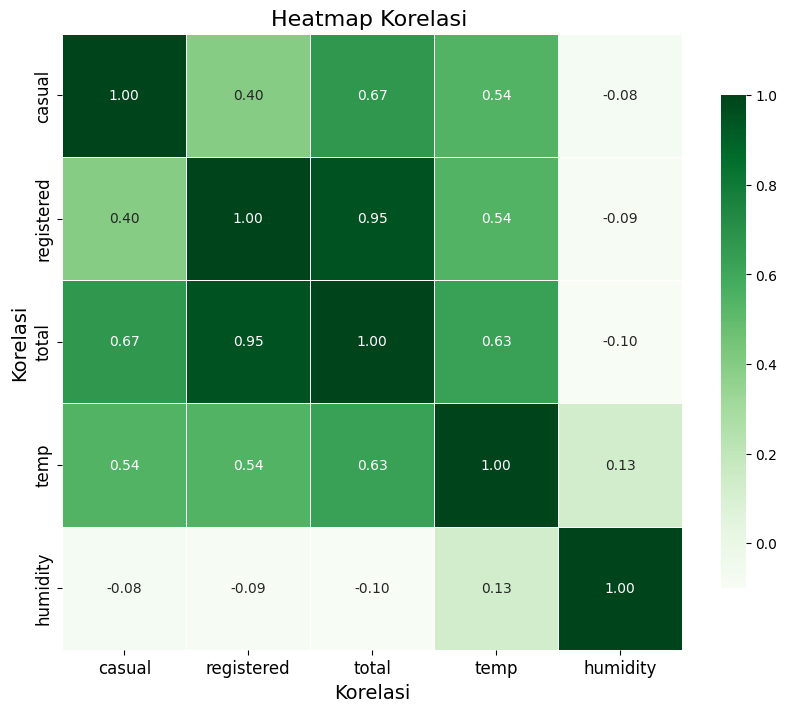

In [28]:
# Menghitung matriks korelasi untuk kolom numerik yang ditambahkan
correlation = day_df[['casual', 'registered', 'total', 'temp', 'humidity']].corr()


# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5, cbar_kws={"shrink": .8})

# Menambahkan judul dan label
plt.title('Heatmap Korelasi ', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Korelasi', fontsize=14)
plt.ylabel('Korelasi', fontsize=14)


# Menampilkan heatmap
plt.show()


**Insight dari Heatmap Korelasi:**

1. **Pengguna Terdaftar dan Total**: Ada korelasi sangat kuat (0.95) antara pengguna **registered** dan **total**, menunjukkan bahwa semakin banyak pengguna terdaftar, semakin tinggi jumlah total pengguna.

2. **Pengguna Kasual**: Korelasi positif (0.67) antara pengguna **casual** dan **total** menunjukkan bahwa peningkatan pengguna kasual juga meningkatkan total pengguna.

3. **Suhu dan Pengguna**: Terdapat korelasi positif moderat (0.63) antara **temperature** dan **total**, yang berarti suhu yang lebih tinggi cenderung menarik lebih banyak pengguna.

4. **Kelembaban**: Semua variabel pengguna menunjukkan korelasi negatif yang lemah dengan **humidity**, menandakan bahwa kelembaban tinggi tidak berpengaruh signifikan terhadap jumlah pengguna.

5. **Suhu dan Kelembaban**: Ada korelasi positif lemah (0.13) antara **temp** dan **humidity**, menunjukkan bahwa peningkatan suhu sedikit berkaitan dengan kenaikan kelembaban.

Secara keseluruhan, pengguna terdaftar dan suhu berperan penting dalam memengaruhi jumlah total pengguna, sementara kelembaban tidak berpengaruh signifikan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan/ hari libur?



**1.   Perbandingan Total Penyewaan antara Working day dan Holiday**




<ipython-input-49-24ac074c68e2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='total', data=day_df, palette='Blues')


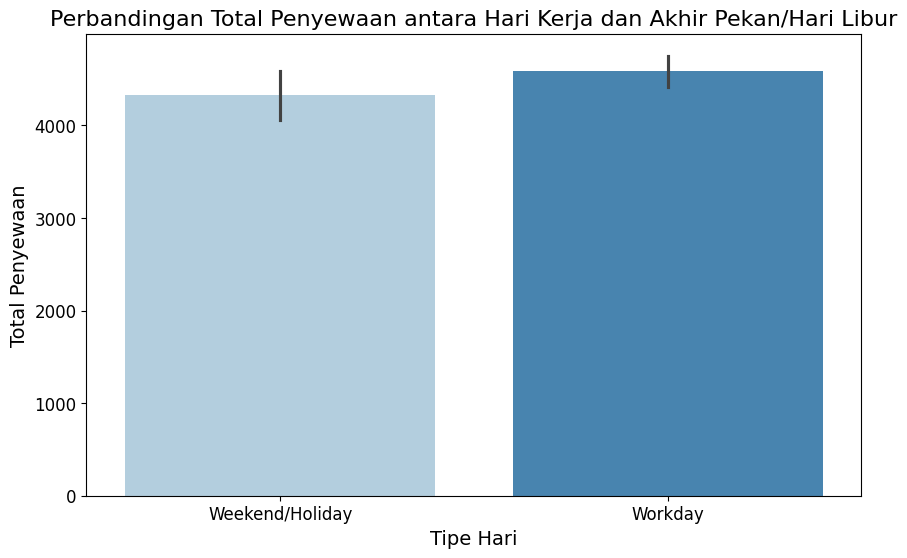

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='total', data=day_df, palette='Blues')
plt.title('Perbandingan Total Penyewaan antara Hari Kerja dan Akhir Pekan/Hari Libur', fontsize=16)
plt.xlabel('Tipe Hari', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Insight:**
- Total Penyewaan Lebih Tinggi pada Hari Kerja: Dari barplot, terlihat bahwa total penyewaan pada hari kerja lebih tinggi dibandingkan dengan hari libur. Ini menunjukkan bahwa lebih banyak orang menggunakan layanan penyewaan selama waktu kerja, yang mungkin berkaitan dengan keperluan transportasi sehari-hari.


**2. Rata-rata Penyewaan Harian berdasarkan Hari dalam Seminggu**

Text(0, 0.5, 'Rata-rata Penyewaan Harian')

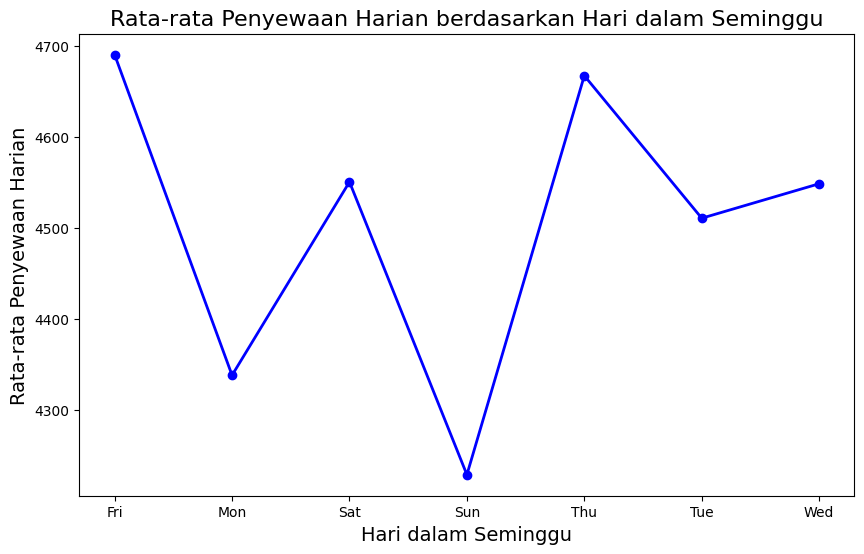

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(day_df.groupby('weekday')['total'].mean(), marker='o', linewidth='2', color='blue')
plt.title('Rata-rata Penyewaan Harian berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=14)
plt.ylabel('Rata-rata Penyewaan Harian', fontsize=14)

**Insight**
- Grafik rata-rata penyewaan harian menunjukkan bahwa **Jumat** adalah hari dengan rata-rata penyewaan tertinggi, menandakan banyak orang menggunakan layanan menjelang akhir pekan. Sebaliknya, **Minggu** memiliki rata-rata penyewaan terendah, mungkin karena orang lebih banyak beristirahat.

**3. Distribusi Penyewaan Berdasarkan Jenis Pengguna (Casual vs. Register) pada Hari Kerja dan Akhir Pekan**

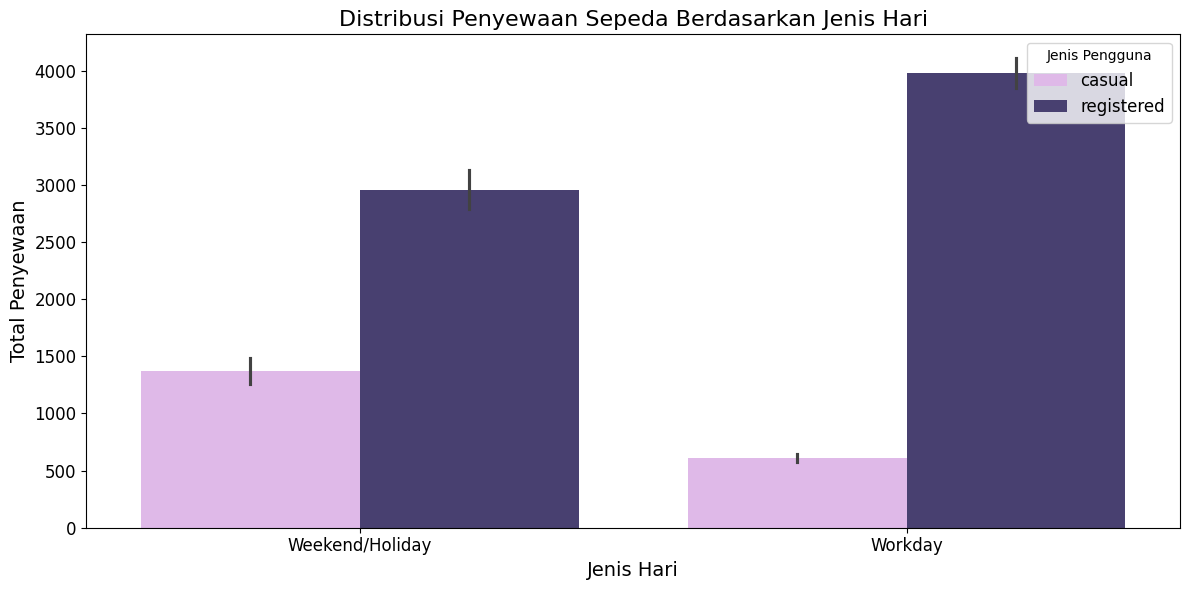

In [31]:
# Mengubah data menjadi long format untuk visualisasi
day_df_long = day_df.melt(id_vars='day_type',
                           value_vars=['casual', 'registered'],
                           var_name='user_type',
                           value_name='total_rentals')

# Menentukan warna untuk setiap tipe pengguna
colors = ['#E4B1F0' ,'#433878']

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x='day_type', y='total_rentals', hue='user_type', data=day_df_long, palette=colors)

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jenis Hari", fontsize=16)
plt.xlabel("Jenis Hari", fontsize=14)
plt.ylabel("Total Penyewaan", fontsize=14)
plt.legend(title='Jenis Pengguna', loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


**Insight**
1. **Dominasi Pengguna Registered pada Hari Kerja**: Pada **hari kerja**, pengguna **terdaftar (registered)** jauh lebih banyak dibandingkan pengguna **kasual (casual)**, menunjukkan bahwa pengguna terdaftar lebih sering menggunakan layanan untuk keperluan harian.

2. **Peningkatan Pengguna Casual pada Akhir Pekan**: Pada **akhir pekan**, jumlah pengguna **kasual** meningkat, menandakan bahwa lebih banyak orang menyewa untuk aktivitas rekreasi saat tidak bekerja.

### Pertanyaan 2: Bagaimana pola penggunaan sepeda antara pengguna Casual dan pengguna Registered dengan mempertimbangkan musim?




**1. Total Penyewaan Pengguna Kasual vs Pengguna Terdaftar**

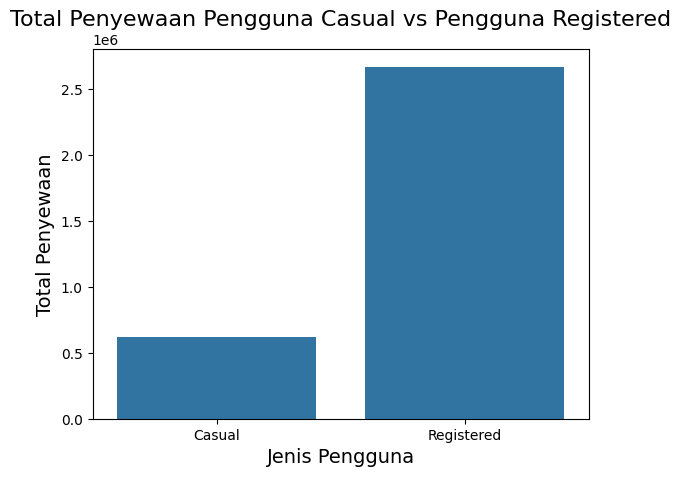

In [50]:
# Menghitung total penyewaan untuk pengguna casual dan registered
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

sns.barplot(x=['Casual', 'Registered'], y=[total_casual, total_registered])
plt.title('Total Penyewaan Pengguna Casual vs Pengguna Registered', fontsize=16)
plt.xlabel('Jenis Pengguna', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.show()

**Insight**
- Grafik menunjukkan bahwa total penyewaan untuk **pengguna registered** jauh lebih tinggi dibandingkan dengan **pengguna casual**, mencerminkan bahwa pengguna terdaftar lebih aktif menggunakan layanan, mungkin karena mereka menyadari keuntungan dari memiliki akun seperti akses promo dan kemudahan dalam penyewaan. Meskipun total penyewaan pengguna kasual lebih rendah, hal ini menciptakan peluang untuk menarik lebih banyak pengguna kasual melalui promosi atau insentif, sehingga mereka terdorong untuk menyewa lebih sering.

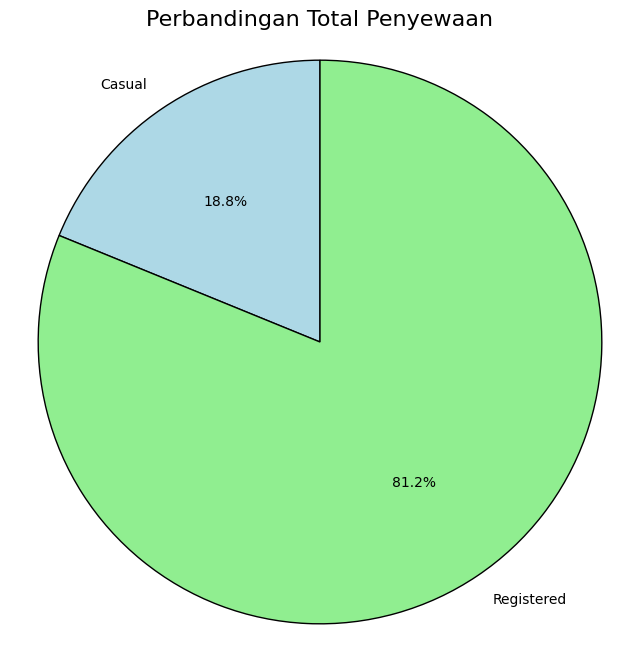

In [33]:
plt.figure(figsize=(8, 8))

# Menghitung total penyewaan untuk pengguna casual dan registered
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Data untuk pie chart
labels = ['Casual', 'Registered']
sizes = [total_casual, total_registered]
colors = ['lightblue', 'lightgreen']

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Menambahkan judul
plt.title('Perbandingan Total Penyewaan', fontsize=16)

# Menampilkan pie chart
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

**2. Distribusi Penyewaan Sepeda berdasarkan Musim**

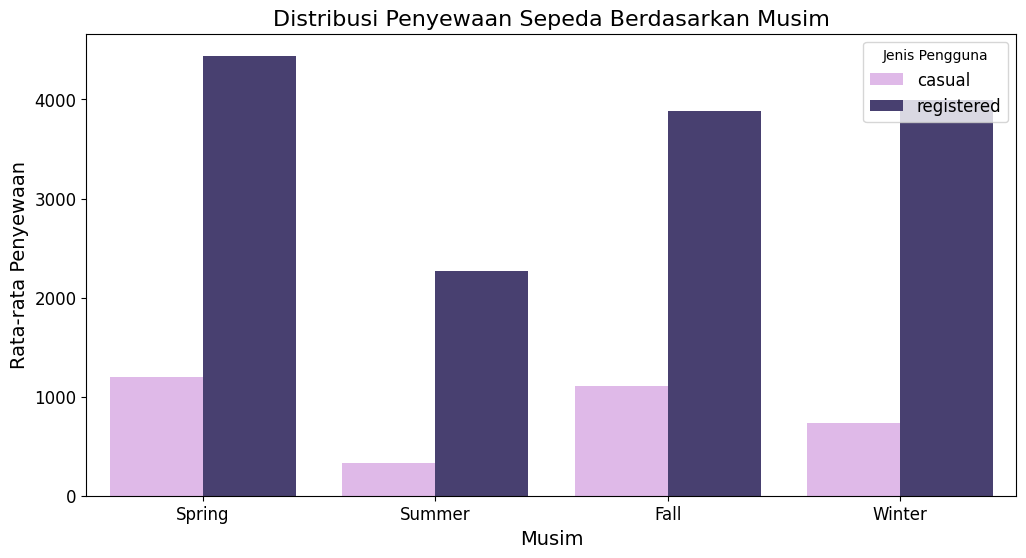

In [34]:
season_plot_df = pd.DataFrame({
    'season': ['Spring', 'Summer', 'Fall', 'Winter'],
    'casual': season_df['casual']['mean'],
    'registered': season_df['registered']['mean']
})

# Mengubah data dari wide format ke long format untuk visualisasi
season_plot_long = season_plot_df.melt(id_vars='season',
                                         value_vars=['casual', 'registered'],
                                         var_name='user_type',
                                         value_name='mean_rentals')

colors = ['#E4B1F0' ,'#433878']


plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='mean_rentals', hue='user_type', data=season_plot_long, palette=colors)

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Rata-rata Penyewaan", fontsize=14)
plt.legend(title='Jenis Pengguna', loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()






**Insight**
- Grafik distribusi penyewaan sepeda menunjukkan bahwa musim **semi** memiliki rata-rata penyewaan tertinggi, terutama dari pengguna terdaftar, yang mencerminkan pemanfaatan layanan untuk keperluan harian saat cuaca membaik. Sebaliknya, musim **panas** mencatat rata-rata penyewaan terendah, kemungkinan karena banyak orang memilih aktivitas lain atau berlibur.

**3. Distribusi Penyewaan Berdasarkan Jenis Pengguna (Casual vs. Register) pada Bulan di Musim Semi**

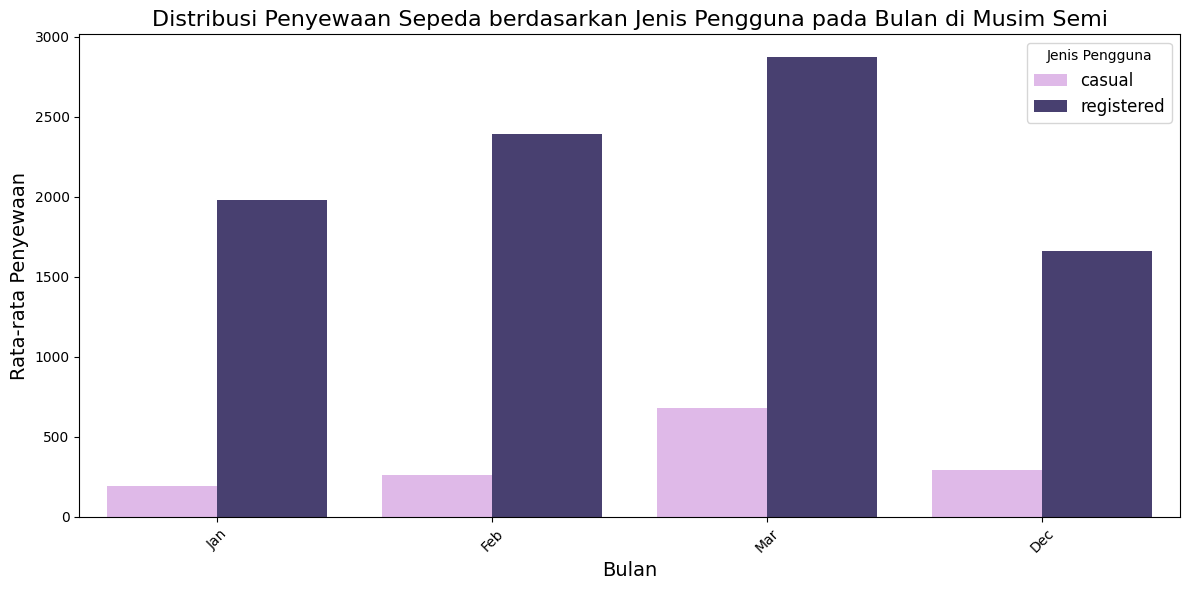

In [35]:
# Filter data untuk musim semi
spring = day_df[day_df['season'] == 'Spring']

# Mengelompokkan data per bulan dan menghitung rata-rata
monthly_spring = spring.groupby(spring['date'].dt.month).agg({
    'casual': ["mean"],
    'registered': ["mean"],
    'total': ["mean"]
}).reset_index()

# Mengubah nama kolom menjadi lebih informatif
monthly_spring.columns = ['month', 'casual', 'registered', 'total_mean']  # Pastikan jumlah kolom sama

# Mengubah format menjadi panjang (long format) untuk visualisasi
monthly_spring_long = monthly_spring.melt(id_vars='month',
                                           value_vars=['casual', 'registered'],
                                           var_name='user_type',
                                           value_name='mean_rentals')

# Menambahkan nama bulan ke dalam dataframe
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_spring_long['month'] = monthly_spring_long['month'].apply(lambda x: month_names[x - 1])  # Mengonversi ke nama bulan

# Inisialisasi warna
colors = ['#E4B1F0', '#433878']

# Membuat grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mean_rentals', hue='user_type', data=monthly_spring_long, palette=colors)
plt.title("Distribusi Penyewaan Sepeda berdasarkan Jenis Pengguna pada Bulan di Musim Semi", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Rata-rata Penyewaan", fontsize=14)
plt.legend(title='Jenis Pengguna', loc='upper right', fontsize=12)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk keterbacaan
plt.tight_layout()  # Menyesuaikan layout
plt.show()

**Insight**

1. **Penyewaan Tertinggi di Maret**: Bulan **Maret** mencatat rata-rata penyewaan tertinggi untuk pengguna **casual** dan **registered**, menunjukkan meningkatnya penggunaan sepeda saat cuaca membaik.

2. **Dominasi Pengguna Terdaftar**: Pengguna **terdaftar** memiliki rata-rata penyewaan yang lebih tinggi dibandingkan pengguna **casual**, menunjukkan penggunaan untuk keperluan sehari-hari.

3. **Peningkatan Penyewaan Kasual di Bulan Februari dan Januari**: Meskipun pengguna terdaftar mendominasi, terdapat peningkatan signifikan pada pengguna **kasual** di **Februari** dan **Januari**.


**4. Distribusi Pengguna Casual dan Registered pada Bulan Maret berdasarkan Cuaca**

  weather_condition      casual   registered        total
0             Clear  666.138889  3222.444444  3888.583333
1        Light Snow  112.500000  1041.500000  1154.000000
2              Mist  843.250000  2766.041667  3609.291667


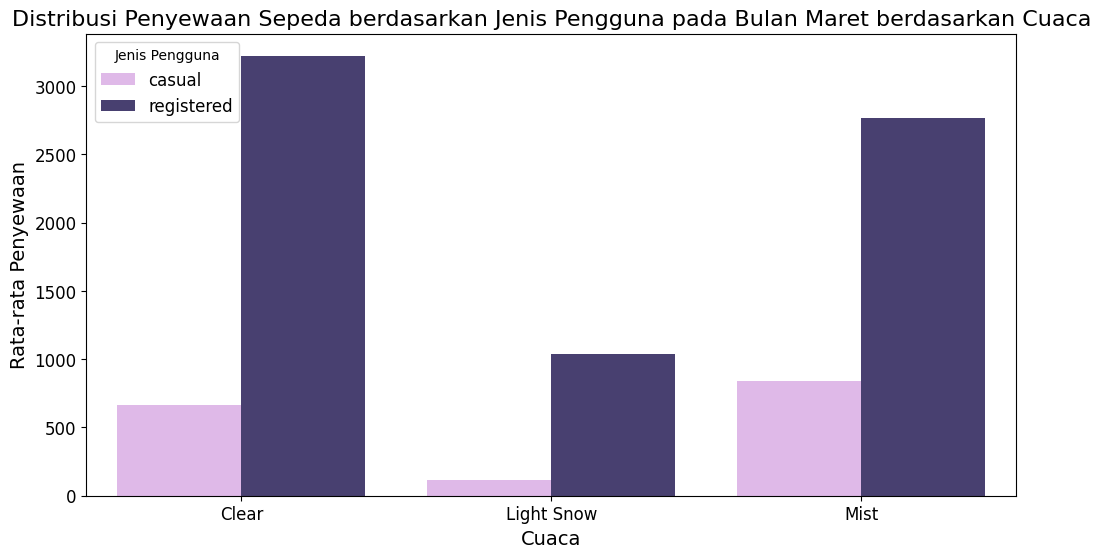

In [51]:
# Filter data untuk bulan Maret
march = day_df[day_df['date'].dt.month == 3]

# Kelompokkan data berdasarkan cuaca
weather_march = march.groupby('weather_condition').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean'
}).reset_index()

print(weather_march)

# Mengubah format menjadi long
weather_march_long = weather_march.melt(id_vars='weather_condition',
                                         value_vars=['casual', 'registered'],
                                         var_name='user_type',
                                         value_name='mean_rentals')

# Inisialisasi warna
colors = ['#E4B1F0', '#433878']

# Membuat grafik bar
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y='mean_rentals', hue='user_type', data=weather_march_long, palette=colors)
plt.title("Distribusi Penyewaan Sepeda berdasarkan Jenis Pengguna pada Bulan Maret berdasarkan Cuaca", fontsize=16)
plt.xlabel("Cuaca", fontsize=14)
plt.ylabel("Rata-rata Penyewaan", fontsize=14)
plt.legend(title='Jenis Pengguna', loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Insight**

1. **Cuaca Clear Mendorong Penyewaan**: Penyewaan tertinggi terjadi pada cuaca **Clear** untuk pengguna **registered**, menunjukkan bahwa cuaca baik berpengaruh positif pada minat pengguna terdaftar.

2. **Pengguna Casual Paling Banyak di Mist**: Pengguna **casual** memiliki rata-rata penyewaan tertinggi saat cuaca **Mist**, menunjukkan mereka tetap menggunakan layanan meskipun cuaca kurang ideal.

3. **Dominasi Pengguna Terdaftar**: Secara umum, pengguna **registered** lebih banyak menyewa sepeda di semua kondisi cuaca, mencerminkan konsistensi dalam penggunaan layanan.


## Analisis Lanjutan (Opsional)

**1. Trend Penyewaan Sepanjang Tahun Berdasarkan Hari Kerja vs. Akhir Pekan
(RFM ANALYSIS)**

In [38]:
# Menghitung tanggal terakhir penyewaan
last_rental = day_df['date'].max()

# Mengelompokkan data berdasarkan jenis pengguna (hari kerja vs. akhir pekan)
rfm_df = day_df.groupby('day_type').agg({
    'date': 'count',  # Menghitung Frequency
    'total': 'sum'    # Menghitung Monetary
}).reset_index()

# Menyimpan tanggal penyewaan terakhir untuk masing-masing jenis pengguna
recency = day_df.groupby('day_type')['date'].max().reset_index()

# Menghitung Recency
recency['recency'] = (last_rental - recency['date']).dt.days

# Menggabungkan frequency, monetary, dan recency
rfm_df = rfm_df.merge(recency[['day_type', 'recency']], on='day_type')

# Mengganti nama kolom
rfm_df.columns = ['day', 'frequency', 'monetary', 'recency']

# Mengatur urutan kolom untuk RFM
rfm_df = rfm_df[['day', 'recency', 'frequency', 'monetary']]

# Tampilkan hasil RFM
print(rfm_df)

               day  recency  frequency  monetary
0  Weekend/Holiday        1        231   1000269
1          Workday        0        500   2292410


<ipython-input-53-3f7f9260e2f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='recency', data=rfm_df.sort_values(by='recency', ascending=True), palette=colors, ax=ax[0])
<ipython-input-53-3f7f9260e2f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='frequency', data=rfm_df.sort_values(by='frequency', ascending=False), palette=colors, ax=ax[1])
<ipython-input-53-3f7f9260e2f1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='monetary', data=rfm_df.sort_values(by='monetary', ascending=False), palette=col

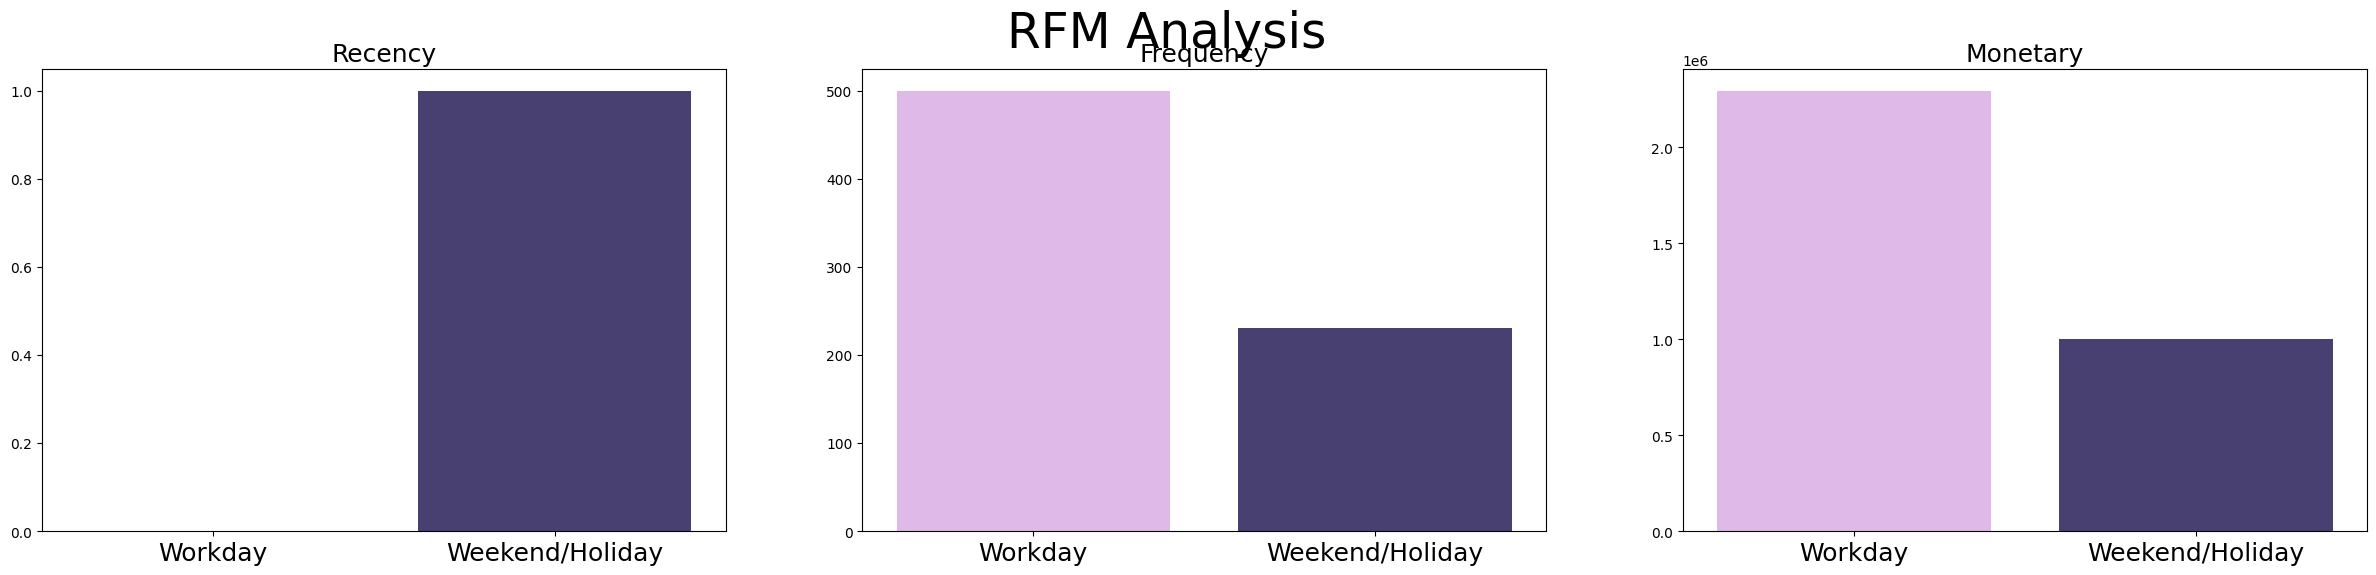

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ['#E4B1F0', '#433878']

sns.barplot(x='day', y='recency', data=rfm_df.sort_values(by='recency', ascending=True), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=18)

sns.barplot(x='day', y='frequency', data=rfm_df.sort_values(by='frequency', ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=18)

sns.barplot(x='day', y='monetary', data=rfm_df.sort_values(by='monetary', ascending=False), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=18)

plt.suptitle('RFM Analysis', fontsize=35)
plt.show()


**Insight**

1. **Frekuensi Penyewaan**: Penyewaan lebih sering terjadi pada **hari kerja** dibandingkan **akhir pekan**, menunjukkan bahwa pengguna menggunakan sepeda untuk kegiatan sehari-hari.

2. **Monetary**: Total penyewaan juga lebih tinggi pada hari kerja, mencerminkan kebutuhan transportasi yang lebih mendesak.

3. **Recency**: Penyewaan lebih baru terjadi pada hari kerja, menunjukkan pengguna aktif yang terus menggunakan layanan tersebut.


## Conclusion

- Conclution pertanyaan 1 : Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan/hari libur?

**Conclution:** Jumlah penyewaan sepeda pada hari kerja ternyata jauh lebih tinggi dibandingkan dengan akhir pekan atau hari libur. Data menunjukkan bahwa pengguna lebih sering memanfaatkan sepeda untuk keperluan sehari-hari, seperti perjalanan ke tempat kerja atau aktivitas rutin lainnya. Ini menunjukkan bahwa penyewaan sepeda lebih dipengaruhi oleh kebutuhan transportasi pada hari kerja, ketimbang untuk bersantai di akhir pekan. Temuan ini memberikan pandangan berharga bagi pengelola layanan penyewaan sepeda agar lebih memprioritaskan promosi dan layanan yang mendukung penggunaan sepeda di hari kerja.
- Conclution pertanyaan 2 : Bagaimana pola penggunaan sepeda antara pengguna Casual dan pengguna Registered dengan mempertimbangkan musim?

**Kesimpulan:** Pengguna Registered menunjukkan pola penggunaan yang lebih konsisten dan tinggi sepanjang musim dibandingkan pengguna Casual. Pada musim semi, misalnya, jumlah penyewaan oleh pengguna Registered mencapai puncaknya, menunjukkan bahwa mereka cenderung menggunakan sepeda untuk keperluan sehari-hari. Di sisi lain, pengguna Casual lebih aktif menjelang akhir musim, terutama saat cuaca semakin baik, seperti yang terlihat pada peningkatan penyewaan di bulan April. Temuan ini menunjukkan bahwa strategi pemasaran yang ditargetkan dapat membantu memaksimalkan penyewaan sepeda dari kedua kelompok pengguna selama musim-musim tertentu.

In [ ]:
# Menyimpan berkas data yang telah dibersihkan
day_df.to_csv('day_df_clean.csv', index=False)